

> ProsusAI/finbert


> FINBERX (fine-tuned on a  blanced dataset)
> FINBERTA (finetuned on an unbalanced dataset)
>distilroberta
>FINTWIT







In [ ]:
import pandas as pd
dft= pd.read_csv('sent_valid.csv')
target_labels = {0:'Bearish',1:'Bullish',2:'Neutral'}
X_test, y_test = dft['text'], dft['label']

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

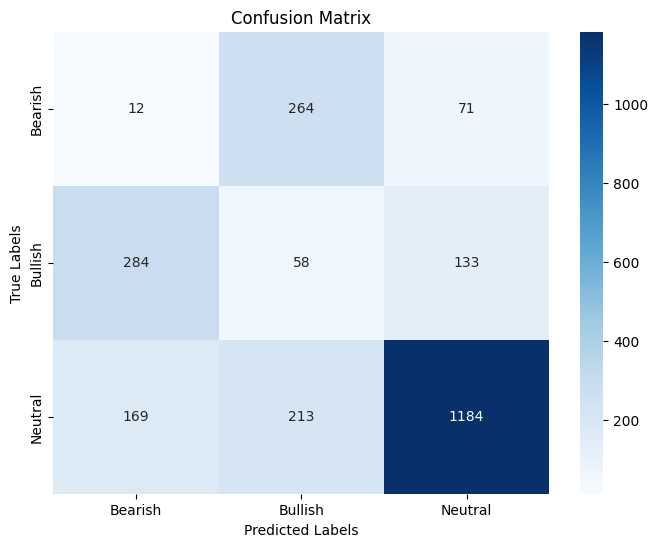

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels.values(), yticklabels=target_labels.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report

# Function to perform predictions
def predict(texts, model, tokenizer):
    # Tokenize the input texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

    # Make predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted labels
    predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()
    return predicted_labels

# Perform predictions on the test data
predicted_labels = predict(X_test.tolist(), model, tokenizer)

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test.tolist(), predicted_labels)

# Print classification report for more detailed evaluation
print(classification_report(y_test.tolist(), predicted_labels, target_names=target_labels.values()))


              precision    recall  f1-score   support

     Bearish       0.03      0.03      0.03       347
     Bullish       0.11      0.12      0.11       475
     Neutral       0.85      0.76      0.80      1566

    accuracy                           0.53      2388
   macro avg       0.33      0.30      0.32      2388
weighted avg       0.58      0.53      0.55      2388



In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("zcharaf/FINBERX")
model = AutoModelForSequenceClassification.from_pretrained("zcharaf/FINBERX")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

FINBERT


In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report

# Function to perform predictions
def predict(texts, model, tokenizer):
    # Tokenize the input texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

    # Make predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted labels
    predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()
    return predicted_labels

# Perform predictions on the test data
predicted_labels = predict(X_test.tolist(), model, tokenizer)

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test.tolist(), predicted_labels)

# Print classification report for more detailed evaluation
print(classification_report(y_test.tolist(), predicted_labels, target_names=target_labels.values()))


              precision    recall  f1-score   support

     Bearish       0.56      0.83      0.67       347
     Bullish       0.63      0.80      0.71       475
     Neutral       0.93      0.76      0.84      1566

    accuracy                           0.78      2388
   macro avg       0.71      0.80      0.74      2388
weighted avg       0.82      0.78      0.79      2388



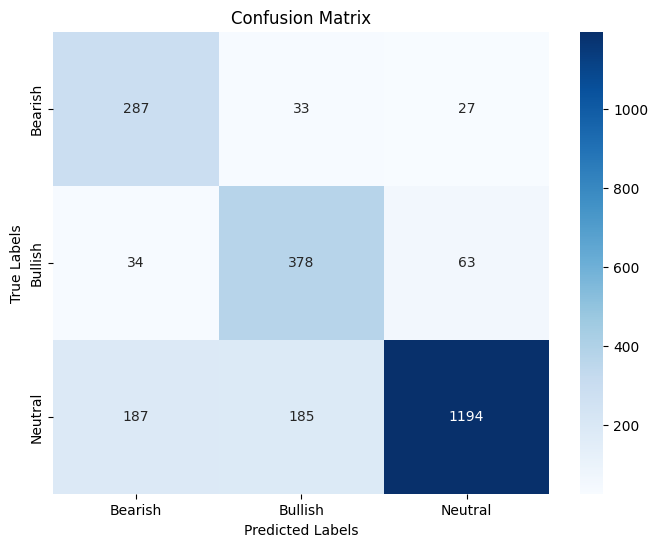

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels.values(), yticklabels=target_labels.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import torch

# Load the tokenizer and model
model_name = "zcharaf/FinBerta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import torch

# Load the tokenizer and model
model_name = "zcharaf/FinBerta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report

# Function to perform predictions
def predict(texts, model, tokenizer):
    # Tokenize the input texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

    # Make predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted labels
    predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()
    return predicted_labels

# Perform predictions on the test data
predicted_labels = predict(X_test.tolist(), model, tokenizer)

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test.tolist(), predicted_labels)

# Print classification report for more detailed evaluation
print(classification_report(y_test.tolist(), predicted_labels, target_names=target_labels.values()))


              precision    recall  f1-score   support

     Bearish       0.77      0.83      0.80       347
     Bullish       0.83      0.81      0.82       475
     Neutral       0.92      0.91      0.92      1566

    accuracy                           0.88      2388
   macro avg       0.84      0.85      0.85      2388
weighted avg       0.88      0.88      0.88      2388



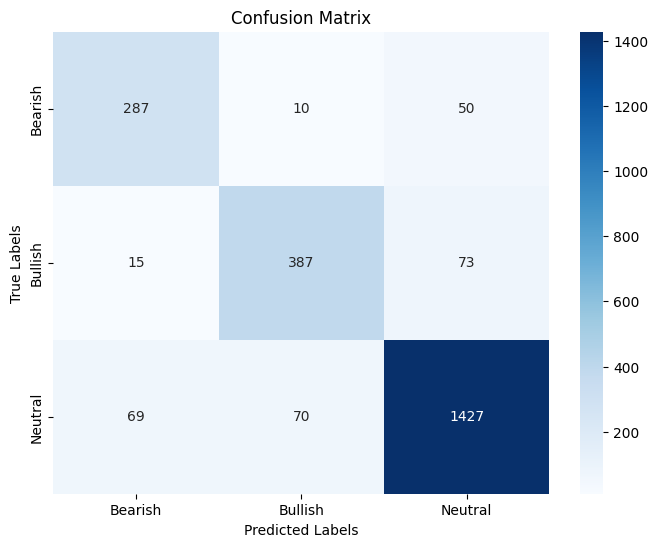

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels.values(), yticklabels=target_labels.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Fined tuned bert model on the intial dataset

In [ ]:
 from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import torch

# Load the tokenizer and model
model_name = "StephanAkkerman/FinTwitBERT-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/713k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/857 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30875, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report

# Function to perform predictions
def predict(texts, model, tokenizer):
    # Tokenize the input texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

    # Make predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted labels
    predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()
    return predicted_labels

# Perform predictions on the test data
predicted_labels = predict(X_test.tolist(), model, tokenizer)

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test.tolist(), predicted_labels)

# Print classification report for more detailed evaluation
print(classification_report(y_test.tolist(), predicted_labels, target_names=target_labels.values()))


              precision    recall  f1-score   support

     Bearish       0.00      0.00      0.00       347
     Bullish       0.87      0.99      0.93       475
     Neutral       0.12      0.03      0.05      1566

    accuracy                           0.22      2388
   macro avg       0.33      0.34      0.32      2388
weighted avg       0.25      0.22      0.22      2388



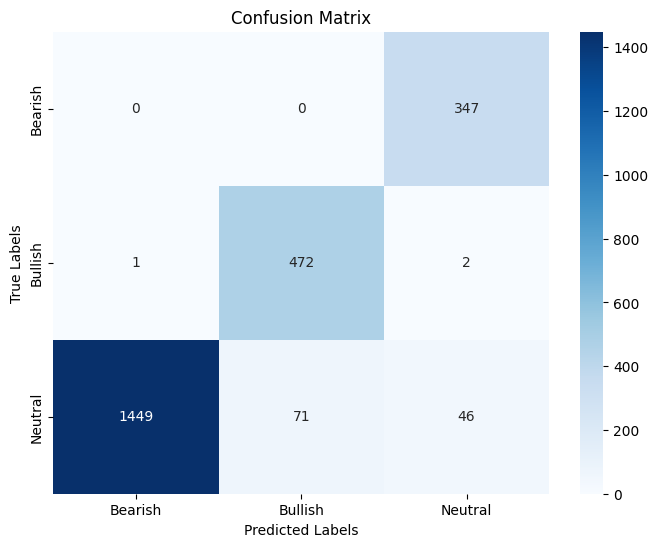

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels.values(), yticklabels=target_labels.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
 from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import torch

# Load the tokenizer and model
model_name = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report

# Function to perform predictions
def predict(texts, model, tokenizer):
    # Tokenize the input texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

    # Make predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted labels
    predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()
    return predicted_labels

# Perform predictions on the test data
predicted_labels = predict(X_test.tolist(), model, tokenizer)

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test.tolist(), predicted_labels)

# Print classification report for more detailed evaluation
print(classification_report(y_test.tolist(), predicted_labels, target_names=target_labels.values()))


              precision    recall  f1-score   support

     Bearish       0.57      0.78      0.65       347
     Bullish       0.07      0.19      0.10       475
     Neutral       0.38      0.14      0.21      1566

    accuracy                           0.24      2388
   macro avg       0.34      0.37      0.32      2388
weighted avg       0.34      0.24      0.25      2388



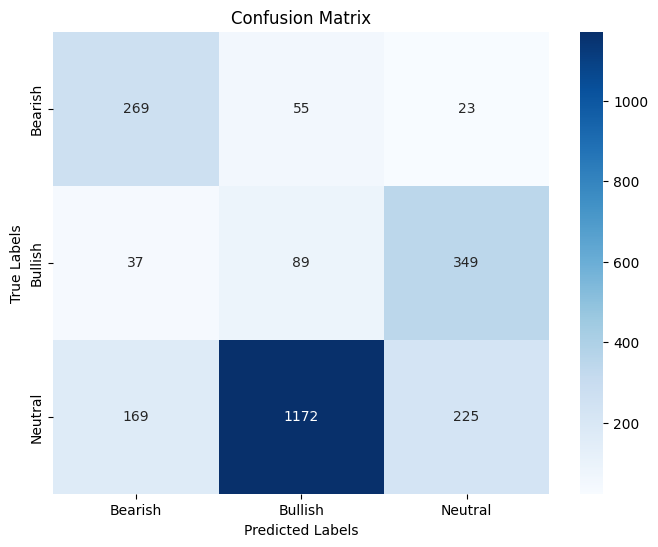

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels.values(), yticklabels=target_labels.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
